<a href="https://colab.research.google.com/github/benintw/DL_intro/blob/main/CNN_%E8%B2%93%E7%8B%97%E5%9C%96%E7%89%87%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 圖片資料下載

In [14]:
!wget --no-check-certificate "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip"

--2022-08-04 11:40:03--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.8.234.192, 2600:1417:3f:1289::317f, 2600:1417:3f:1291::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.8.234.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip.2’

kagglecatsanddogs_5 100%[===================>] 786.67M   246MB/s    in 3.3s    

2022-08-04 11:40:07 (241 MB/s) - ‘kagglecatsanddogs_5340.zip.2’ saved [824887076/824887076]



In [ ]:
!unzip "kagglecatsanddogs_5340.zip"

# 1. 資料讀取

In [15]:
import os, cv2, glob

images = []
labels = []
dict_labels = {"Cat":0,"Dog":1}

for folders in glob.glob("/content/PetImages/*"):
    print(folders, "圖片讀取中")
    for filename in os.listdir(folders):
        label = folders.split("/")[-1]
        try:
            img = cv2.imread(os.path.join(folders,filename))
            img = cv2.resize(img, dsize=(80,80))
            if img is not None:
                images.append(img)
                labels.append(dict_labels[label])
        except:
            pass
print("圖片讀取完畢")


/content/PetImages/Dog 圖片讀取中
/content/PetImages/Cat 圖片讀取中
圖片讀取完畢


In [16]:
print("圖片數量: {}".format(len(images)))
print("標籤數量: {}".format(len(labels)))

圖片數量: 24946
標籤數量: 24946


# 2. 資料預處理

### 資料分割

In [24]:
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils import np_utils

train_feature, test_feature, train_label, test_label = \
train_test_split(images, labels, test_size=0.2)

train_feature = np.array(train_feature)
test_feature = np.array(test_feature)
train_label = np.array(train_label)
test_label = np.array(test_label)

print("資料分割完畢")

資料分割完畢


### 顯示訓練和測試資料

In [25]:
print("訓練資料維度: {}".format(train_feature.shape))
print(f"訓練標籤維度: {train_label.shape}")
print("=============================")
print("測試資料維度: {}".format(test_feature.shape))
print(f"測試標籤維度: {test_label.shape}")

訓練資料維度: (19956, 80, 80, 3)
訓練標籤維度: (19956,)
測試資料維度: (4990, 80, 80, 3)
測試標籤維度: (4990,)


### 圖片資料標準化

In [26]:
train_feature = train_feature/255
test_feature = test_feature/255
print("Normalization completed")

Normalization completed


### 標籤轉換為One-Hot Encoding

In [27]:
train_label = np_utils.to_categorical(train_label)
test_label = np_utils.to_categorical(test_label)
print("One-Hot Encoding completed")

One-Hot Encoding completed


# 3. 建立模型

- 3 個卷積層和池化層
- 1 平坦層
- 1 隱藏層
- 拋棄層


### 建立模型物件

In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense

model = Sequential()

# 建立第一層卷基層
model.add(Conv2D(filters=8, kernel_size=(5,5), padding='same',
                 input_shape=(80,80,3), activation='relu'))

    # filters: 濾鏡個數, 每一個filter 會使用特定kernel來擷取局部特徵
    # kernel_size: 3x3 or 5x5 , ...
    # padding: 非必填, 可以是'same' 表示圖片周圍填入0, 或是是valid. 預設為valid 表示不填充
    # strides: 非必填, 移動幅度, 預設為1
    # input_shape: 非必填, 若設定此參數, 表示建立輸入層和第一層卷基層, 參數值為原始圖片大小. 
    #               若未設此參數, 表示建立卷積層.
    # activation: 激勵函式

# 因為有 8 個filters, 所以會產生 8 張 80x80 的卷積運算圖片.

# 建立第一層池化層
model.add(MaxPooling2D(pool_size=(2,2)))

    # pool_size: 池化區塊大小, 一般使用(2,2), (3,3), (4,4)

# 池化層會將圖片長寬各減一半, 所以會產生 8 張 40x40 的圖片

# 建立第一層拋棄層
model.add(Dropout(0.2))

# 建立第2層卷基層, 池化層, 和拋棄層
model.add(Conv2D(filters=16, kernel_size=(5,5),
                 padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# 第二層會產生 16 張 40x40 的圖片
# 經第二層池化層後產生 16張 20x20的圖片

# 建立第3層卷基層, 池化層, 和拋棄層
model.add(Conv2D(filters=32, kernel_size=(5,5),
                 padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# 第3層會產生 32 張 20x20 的圖片
# 經第3層池化層後產生 32 張 10x10的圖片

# 建立平坦層及拋棄層
model.add(Flatten()) #平坦層的作用是將圖片資料轉換為一維向量
model.add(Dropout(0.2))


# 建立全連結隱藏層
    # 建立含有含有128 神經元的隱藏層
model.add(Dense(units=128,activation='relu')) 

# 建立輸出層
    # 輸出資料有2個
model.add(Dense(units=2, activation='softmax'))

'''
Softmax 會計算出所有輸出值的機率. 通常分類深度學習的輸出層激勵函式都會用Softmax, 
因為輸出值機率最大者就是模型預測的類別.
'''

print("Model is now built")

Model is now built


### 查看權重數量

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 80, 80, 8)         608       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 40, 40, 8)        0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 40, 40, 8)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 40, 40, 16)        3216      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 20, 20, 16)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 20, 20, 16)       

# 4. 訓練模型

In [38]:
'''
20% of training is for validation

15964筆訓練資料
3991 驗證資料

訓練20次
每批次讀取200筆資料
簡易顯示訓練過程
'''

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.fit(x=train_feature,y=train_label,validation_split=0.2,
          epochs=20, batch_size=200, verbose=2)

Epoch 1/20
80/80 - 16s - loss: 0.7019 - accuracy: 0.5160 - val_loss: 0.6896 - val_accuracy: 0.5175 - 16s/epoch - 201ms/step
Epoch 2/20
80/80 - 2s - loss: 0.6809 - accuracy: 0.5601 - val_loss: 0.6647 - val_accuracy: 0.6020 - 2s/epoch - 26ms/step
Epoch 3/20
80/80 - 2s - loss: 0.6481 - accuracy: 0.6220 - val_loss: 0.6025 - val_accuracy: 0.6819 - 2s/epoch - 26ms/step
Epoch 4/20
80/80 - 2s - loss: 0.5950 - accuracy: 0.6842 - val_loss: 0.5713 - val_accuracy: 0.7134 - 2s/epoch - 26ms/step
Epoch 5/20
80/80 - 2s - loss: 0.5650 - accuracy: 0.7125 - val_loss: 0.5305 - val_accuracy: 0.7382 - 2s/epoch - 26ms/step
Epoch 6/20
80/80 - 2s - loss: 0.5498 - accuracy: 0.7184 - val_loss: 0.5166 - val_accuracy: 0.7518 - 2s/epoch - 28ms/step
Epoch 7/20
80/80 - 2s - loss: 0.5274 - accuracy: 0.7330 - val_loss: 0.5037 - val_accuracy: 0.7585 - 2s/epoch - 30ms/step
Epoch 8/20
80/80 - 2s - loss: 0.5180 - accuracy: 0.7406 - val_loss: 0.4980 - val_accuracy: 0.7625 - 2s/epoch - 26ms/step
Epoch 9/20
80/80 - 2s - loss:

# 5. 評估準確率

In [40]:
scores = model.evaluate(test_feature,test_label)
print("\n準確率準確率= ",scores[1])

156/156 [==============================] - 1s 5ms/step - loss: 0.4462 - accuracy: 0.7926

準確率準確率=  0.7925851941108704


# 儲存訓練好的模型

In [41]:
model.save("catdog_model_trained.h5")

# 預測自己的貓狗圖片

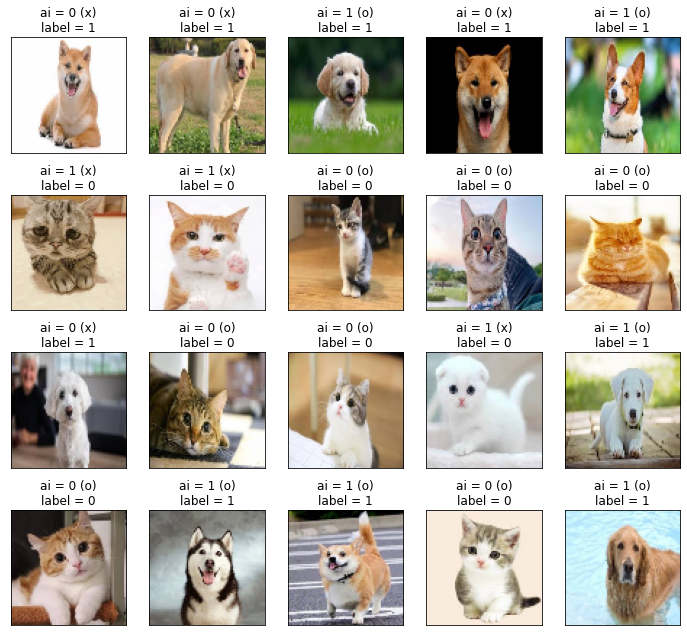

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import glob, cv2

def show_images_labels_predictions(images,labels,predictions,start_id,num=10):
    
    plt.figure(figsize=(12,14))
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5,1+i)
        ax.imshow(images[start_id])

        if (len(predictions)>0):
            title = 'ai = ' + str(predictions[start_id])
            title += (' (o)' if predictions[start_id] == \
                      labels[start_id] else ' (x)')
            title += '\nlabel = ' + str(labels[start_id])
        else:
            title = 'label = ' + str(labels[start_id])
        ax.set_title(title,fontsize=12)
        ax.set_xticks([])
        ax.set_yticks([])
        start_id += 1
    plt.show()

# 讀取Colab 根目錄的所有圖片檔案
files = glob.glob("/content/*.jpg")
test_feature = []
test_label = []
dict_labels = {"Cat":0, "Dog":1}
for file in files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, dsize=(80,80))
    test_feature.append(img)
    label = file[9:12] # /content/Cat1.jpg 的標籤值為第10~12個字元 "Cat"
    test_label.append(dict_labels[label])

test_feature = np.array(test_feature)
test_label = np.array(test_label)
test_feature_vector = test_feature.reshape(len(test_feature), 80,80,3)
test_feature_n = test_feature_vector / 255
model = load_model("catdog_model_trained.h5")

prediction = model.predict(test_feature_n)
prediction = np.argmax(prediction, axis=1)
show_images_labels_predictions(test_feature, test_label, prediction, 0 , len(test_feature))

# 利用 Gradio 展示貓狗圖片辨識

In [47]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 1.4 MB/s 
     |████████████████████████████████| 141 kB 70.2 MB/s 
     |████████████████████████████████| 275 kB 66.2 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 54 kB 3.7 MB/s 
     |████████████████████████████████| 2.3 MB 51.6 MB/s 
     |████████████████████████████████| 84 kB 2.9 MB/s 
     |████████████████████████████████| 212 kB 53.6 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 57 kB 4.8 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 80 kB 9.5 MB/s 
     |████████████████████████████████| 68 kB 1.6 MB/s 
     |████████████████████████████████| 43 kB 406 kB/s 
     |████████████████████████████████| 4.1 MB 19.6 MB/s 
     |████████████████████████████████| 62 kB 927 

In [48]:
from tensorflow.keras.models import load_model
import gradio as gr

model = load_model("/content/catdog_model_trained.h5")

def catdog(image):
    image = image.reshape(1,80,80,3) #將圖片格式轉為（1,80,80,3) 以符合模型格式
    prediction = model.predict(image).tolist()[0]
    class_names = ["Cat", "Dog"]
    return {class_names[i]: prediction[i] for i in range(2)}

inp = gr.inputs.Image(shape=(80,80), source='upload')
out = gr.outputs.Label(num_top_classes=2, label='Predicted:')
grobj = gr.Interface(fn=catdog, inputs=inp, outputs = out, title='貓狗圖片辨識')
grobj.launch()

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://11878.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f19a0619710>,
 'http://127.0.0.1:7860/',
 'https://11878.gradio.app')